In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('NSL-KDD/KDDTrain+.txt', delimiter= ',', header = None)
test_data = pd.read_csv('NSL-KDD/KDDTest+.txt', delimiter= ',', header = None)
print(data.head(5))
# print(data.shape)
# print(data.dtypes)

   0    1         2   3    4     5   6   7   8   9  ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0 ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0 ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0 ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0 ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0 ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]


In [2]:
# reading the test dataset
test_data = pd.read_csv('NSL-KDD/KDDTest+.txt', delimiter= ',', header = None)
print(test_data.head(5))
# print(test_data.shape)
# print(test_data.dtypes)

   0     1         2     3      4   5   6   7   8   9  ...    33    34    35  \
0   0   tcp   private   REJ      0   0   0   0   0   0 ...  0.04  0.06  0.00   
1   0   tcp   private   REJ      0   0   0   0   0   0 ...  0.00  0.06  0.00   
2   2   tcp  ftp_data    SF  12983   0   0   0   0   0 ...  0.61  0.04  0.61   
3   0  icmp     eco_i    SF     20   0   0   0   0   0 ...  1.00  0.00  1.00   
4   1   tcp    telnet  RSTO      0  15   0   0   0   0 ...  0.31  0.17  0.03   

     36   37   38    39    40       41  42  
0  0.00  0.0  0.0  1.00  1.00  neptune  21  
1  0.00  0.0  0.0  1.00  1.00  neptune  21  
2  0.02  0.0  0.0  0.00  0.00   normal  21  
3  0.28  0.0  0.0  0.00  0.00    saint  15  
4  0.02  0.0  0.0  0.83  0.71    mscan  11  

[5 rows x 43 columns]


In [4]:
data_cat = data.select_dtypes(include=['object']).copy()
data_cat

,1,2,3,41
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
5,tcp,private,REJ,neptune
6,tcp,private,S0,neptune
7,tcp,private,S0,neptune
8,tcp,remote_job,S0,neptune
9,tcp,private,S0,neptune


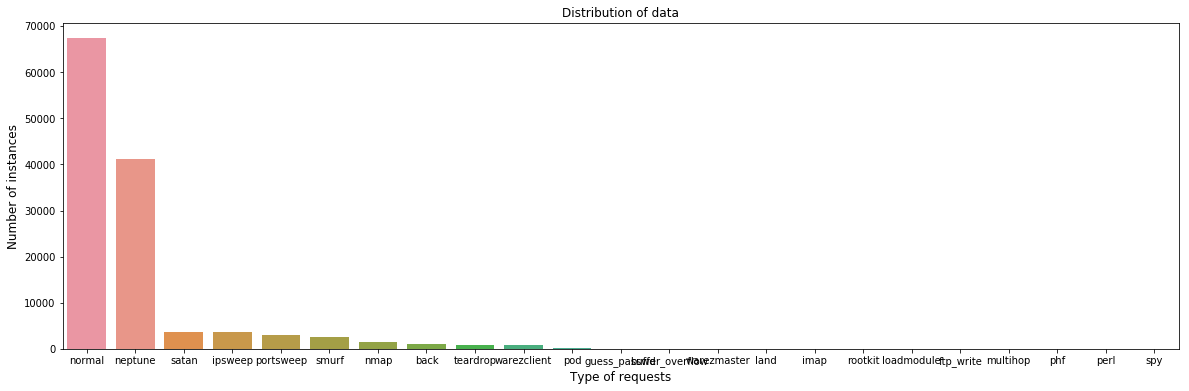

In [5]:
# Data visualisation for the entire dataset
import seaborn as sns
import matplotlib.pyplot as plt
attack_count = data_cat[41].value_counts()
# sns.set(figure.figsize=(5,6))
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(attack_count.index, attack_count.values)
plt.title('Distribution of data')
plt.ylabel('Number of instances', fontsize=12)
plt.xlabel('Type of requests', fontsize=12)
plt.show()

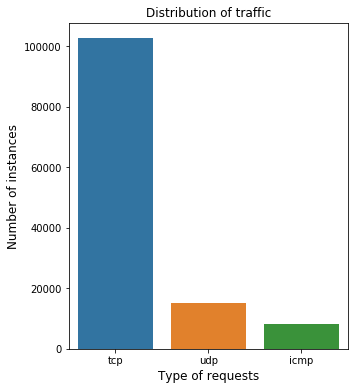

In [6]:
# Data #visualisation
import seaborn as sns
import matplotlib.pyplot as plt
attack_count = data_cat[1].value_counts()
# sns.set(figure.figsize=(5,6))
plt.rcParams['figure.figsize']=(5,6)
sns.barplot(attack_count.index, attack_count.values)
plt.title('Distribution of traffic')
plt.ylabel('Number of instances', fontsize=12)
plt.xlabel('Type of requests', fontsize=12)
plt.show()

In [7]:
# Data pre-processing
# columns with object type data are identified and further subjected to label change 
# according to the detection type- whether its anomaly or normal
# then label encoded
data_cat = data.select_dtypes(include=['object']).copy()
data_cat

,1,2,3,41
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
5,tcp,private,REJ,neptune
6,tcp,private,S0,neptune
7,tcp,private,S0,neptune
8,tcp,remote_job,S0,neptune
9,tcp,private,S0,neptune


In [8]:
# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

In [9]:
# Encoding the labels for normal and anomaly type
data[41].replace(attack_dict, inplace = True)
test_data[41].replace(attack_dict, inplace = True)
        
print(data[41])

0         normal
1         normal
2            DoS
3         normal
4         normal
5            DoS
6            DoS
7            DoS
8            DoS
9            DoS
10           DoS
11           DoS
12        normal
13           R2L
14           DoS
15           DoS
16        normal
17         Probe
18        normal
19        normal
20           DoS
21           DoS
22        normal
23        normal
24           DoS
25        normal
26           DoS
27        normal
28        normal
29        normal
           ...  
125943    normal
125944    normal
125945    normal
125946       DoS
125947     Probe
125948       DoS
125949    normal
125950       DoS
125951    normal
125952    normal
125953       DoS
125954    normal
125955    normal
125956    normal
125957    normal
125958       DoS
125959    normal
125960    normal
125961    normal
125962    normal
125963    normal
125964       DoS
125965    normal
125966       DoS
125967    normal
125968       DoS
125969    normal
125970    norm

In [10]:
# dictionary to map different attack type as just anomaly
anomaly_dict = {
    'normal': 'normal',
    'U2R': 'anomaly',
    'R2L': 'anomaly',
    'Probe': 'anomaly',
    'DoS':'anomaly'
} 

In [11]:
# Encoding the labels for normal and anomaly
data[41].replace(anomaly_dict, inplace = True)
test_data[41].replace(anomaly_dict, inplace = True)
        
print(data[41].unique())

['normal' 'anomaly']


In [12]:
# data_cat = data.select_dtypes(include=['object']).copy()
# data_cat

In [13]:
# %matplotlib inline
# data.groupby(data[41]).plot(kind='barh')

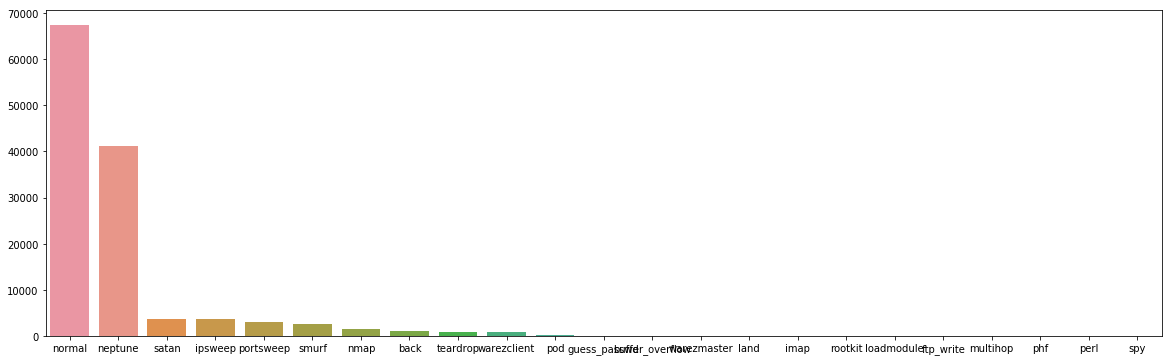

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
attack_count = data_cat[41].value_counts()
# sns.set(figure.figsize=(5,6))
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(attack_count.index, attack_count.values)
# plt.title('Frequency Distribution of Carriers')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Carrier', fontsize=12)
plt.show()

In [15]:
# data[41].value_counts()[:20].plot(kind='bar')
# plt.show()

In [16]:
print(data.isnull().values.sum())
print(test_data.isnull().values.sum())

0
0


In [17]:
print(data[1].value_counts().count())
print(data[2].value_counts().count())
print(data[3].value_counts().count())
print(data[41].value_counts().count())

3
70
11
2


In [18]:
data[1] = data[1].astype('category')
data[2] = data[2].astype('category')
data[3] = data[3].astype('category')
data[41] = data[41].astype('category')
print(data[1].dtypes, data[2].dtypes, data[3].dtypes, data[41].dtypes)

category category category category


In [19]:
data[1] = data[1].cat.codes
data[2] = data[2].cat.codes
data[3] = data[3].cat.codes
data[41] = data[41].cat.codes
# print(data[41])

In [20]:
# category data count for the test dataset
print(test_data[1].value_counts().count())
print(test_data[2].value_counts().count())
print(test_data[3].value_counts().count())
print(test_data[41].value_counts().count())

3
64
11
2


In [21]:
# category conversion for the test dataset
test_data[1] = test_data[1].astype('category')
test_data[2] = test_data[2].astype('category')
test_data[3] = test_data[3].astype('category')
test_data[41] = test_data[41].astype('category')
print(test_data[1].dtypes, test_data[2].dtypes, test_data[3].dtypes, test_data[41].dtypes)

category category category category


In [22]:
# Label encoding for test dataset
test_data[1] = test_data[1].cat.codes
test_data[2] = test_data[2].cat.codes
test_data[3] = test_data[3].cat.codes
test_data[41] = test_data[41].cat.codes
# print(data[41])

In [23]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # data_sub = pd.DataFrame(data[1], data[2], data[41]).copy()
# # df.plot(x=data_sub.index.tolist(), y=(data_sub[1], data_sub[2], data_sub[3])
# # plot.show()
        
# data[41].plot(kind='hist',rwidth=0.8)
# plt.show()

In [24]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report

In [25]:
X = data.iloc[:, 0:-1]
y_ = data.iloc[:, -1]

In [26]:
test_X = test_data.iloc[:, 0:-1]
test_y_ = test_data.iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_, test_size=0.2, random_state=0)

In [28]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [29]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
prediction_Dtree = clf.predict(X_test)
print('Decision Tree classifier: ', metrics.accuracy_score(y_test, prediction_Dtree))
print(classification_report(y_test, prediction_Dtree))

Decision Tree classifier:  0.9060527882516373
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.38      0.43      0.40         7
           2       0.89      0.62      0.73        13
           3       0.50      0.80      0.62         5
           4       0.73      0.35      0.47        23
           5       0.41      0.47      0.44        15
           6       0.35      0.27      0.31        22
           7       0.58      0.42      0.49        33
           8       0.62      0.57      0.59        23
           9       0.59      0.56      0.57        48
          10       0.60      0.49      0.54        49
          11       0.72      0.74      0.73       120
          12       0.73      0.75      0.74       150
          13       0.60      0.57      0.58        92
          14       0.67      0.64      0.65       140
          15       0.88      0.91      0.90       775
          16       0.81      0.79  

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_Dtree))

[[   10     2     0     0     0     0     2     0     0     0     0     0
      0     0     0     0     0     0     0     0     1     1]
 [    3     3     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     8     2     0     0     1     0     0     1     0     0
      0     0     0     0     0     0     1     0     0     0]
 [    0     0     0     4     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     2     0     1     8     5     1     0     0     0     1     0
      1     0     0     0     0     2     1     1     0     0]
 [    0     0     0     0     0     7     2     0     0     1     1     0
      0     0     0     1     0     1     1     1     0     0]
 [    0     1     1     0     1     1     6     4     1     3     0     0
      1     0     0     0     1     0     0     0     1     1]
 [    1     0     0     1     0     3    

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_Dtree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_Dtree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_Dtree)))  

In [30]:
prediction_Dtree_test = clf.predict(test_X)
print('Decision Tree classifier: ', metrics.accuracy_score(test_y_, prediction_Dtree_test))
print(classification_report(test_y_, prediction_Dtree_test))

Decision Tree classifier:  0.6251774308019872
              precision    recall  f1-score   support

           0       0.07      0.03      0.04       123
           1       0.04      0.02      0.03        87
           2       0.05      0.02      0.03        55
           3       0.00      0.00      0.00       116
           4       0.01      0.01      0.01       101
           5       0.05      0.04      0.04       103
           6       0.30      0.08      0.13       157
           7       0.10      0.02      0.04       249
           8       0.01      0.01      0.01       131
           9       0.10      0.17      0.13       106
          10       0.10      0.04      0.06       195
          11       0.11      0.17      0.14       461
          12       0.07      0.04      0.05       486
          13       0.09      0.03      0.05       519
          14       0.18      0.10      0.12       736
          15       0.27      0.26      0.26      1176
          16       0.24      0.25  

In [33]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y_, prediction_Dtree_test))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y_, prediction_Dtree_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y_, prediction_Dtree_test)))  

Mean Absolute Error: 1.4486337828246985
Mean Squared Error: 10.794091554293825
Root Mean Squared Error: 3.2854362806625583


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [35]:
clf_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
clf_2.fit(X_train, y_train)
prediction_RandomTree = clf_2.predict(X_test)
print('Random Tree classifier: ', metrics.accuracy_score(y_test, prediction_RandomTree))
print(classification_report(y_test, prediction_RandomTree))

Random Tree classifier:  0.8952966858503671
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.38      0.43      0.40         7
           2       0.70      0.54      0.61        13
           3       0.21      0.80      0.33         5
           4       0.80      0.35      0.48        23
           5       0.40      0.53      0.46        15
           6       0.47      0.36      0.41        22
           7       0.57      0.48      0.52        33
           8       0.53      0.43      0.48        23
           9       0.62      0.58      0.60        48
          10       0.55      0.49      0.52        49
          11       0.70      0.75      0.72       120
          12       0.74      0.75      0.74       150
          13       0.58      0.51      0.54        92
          14       0.68      0.67      0.67       140
          15       0.86      0.91      0.89       775
          16       0.78      0.70    

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_RandomTree))

[[  10    6    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   2    5    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  10    3    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   2    3    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   9   14    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  10    5    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  10   12    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  13   20    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  12   11    0    0    0    0    0    0    0    0    0    0    0    0
     0  

In [36]:
prediction_Randomtree_test = clf_2.predict(test_X)
print('Random Tree classifier: ', metrics.accuracy_score(test_y_, prediction_Randomtree_test))
print(classification_report(test_y_, prediction_Randomtree_test))

Random Tree classifier:  0.6054826117814053
              precision    recall  f1-score   support

           0       0.04      0.20      0.07       123
           1       0.02      0.10      0.03        87
           2       0.00      0.02      0.01        55
           3       0.05      0.04      0.05       116
           4       0.01      0.02      0.01       101
           5       0.05      0.06      0.05       103
           6       0.05      0.04      0.04       157
           7       0.15      0.03      0.05       249
           8       0.00      0.00      0.00       131
           9       0.04      0.04      0.04       106
          10       0.02      0.05      0.03       195
          11       0.08      0.07      0.08       461
          12       0.13      0.03      0.05       486
          13       0.09      0.03      0.05       519
          14       0.11      0.05      0.07       736
          15       0.37      0.14      0.20      1176
          16       0.24      0.22    

In [39]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_features=42, random_state=0)
clf_3 = LinearSVC(random_state=0, tol=1e-5)
clf_3.fit(X_train, y_train)

prediction_RandomTree = clf_3.predict(X_test)
print('SVM classifier: ', metrics.accuracy_score(y_test, prediction_RandomTree))
print(classification_report(y_test, prediction_RandomTree))


Random Tree classifier:  0.0005953562214725144
              precision    recall  f1-score   support

           0       0.00      0.62      0.00        16
           1       0.00      0.71      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00       120
          12       0.00      0.00      0.00       150
          13       0.00      0.00      0.00        92
          14       0.00      0.00      0.00       140
          15       0.00      0.00      0.00       775
          16       0.00      0.00 

C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
prediction_svm = svm_clf.predict(X_test)
print('SVM classifier: ', metrics.accuracy_score(y_test, prediction_svm))
print(classification_report(y_test, prediction_RandomTree))

SVM classifier:  0.0007541178805318515
              precision    recall  f1-score   support

           0       0.00      0.62      0.00        16
           1       0.00      0.71      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00       120
          12       0.00      0.00      0.00       150
          13       0.00      0.00      0.00        92
          14       0.00      0.00      0.00       140
          15       0.00      0.00      0.00       775
          16       0.00      0.00      0.0

C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

NBclassifier = BernoulliNB()
NBclassifier.fit(X_train, y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [60]:
prediction_NB = svm_clf.predict(X_test)
print('NB classifier: ', metrics.accuracy_score(y_test, prediction_NB))
print(classification_report(y_test, prediction_NB))

NB classifier:  0.0007541178805318515
              precision    recall  f1-score   support

           0       0.00      0.94      0.00        16
           1       0.00      0.57      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00       120
          12       0.00      0.00      0.00       150
          13       0.00      0.00      0.00        92
          14       0.00      0.00      0.00       140
          15       0.00      0.00      0.00       775
          16       0.00      0.00      0.00

C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\reenzhere\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
